In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, auc,confusion_matrix
from sklearn.model_selection import train_test_split

In [138]:
data= pd.read_csv('fraud.csv', chunksize=2000000)

In [139]:
for i, chunk in enumerate(data):
    print(f"Processing chunk {i+1}, shape: {chunk.shape}")   

Processing chunk 1, shape: (2000000, 11)
Processing chunk 2, shape: (2000000, 11)
Processing chunk 3, shape: (2000000, 11)
Processing chunk 4, shape: (362620, 11)


In [140]:
data=chunk
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6000000,426,CASH_OUT,2360.85,C1227330549,368465.00,366104.15,C1683370394,455269.23,457630.08,0,0
6000001,426,CASH_OUT,51087.75,C1218504613,366104.15,315016.40,C1309874651,740920.94,792008.69,0,0
6000002,426,CASH_OUT,131029.15,C1373118556,315016.40,183987.26,C987636784,3643748.61,3774777.76,0,0
6000003,426,CASH_OUT,209795.98,C2003874771,183987.26,0.00,C902195489,2409385.70,2619181.68,0,0
6000004,426,CASH_OUT,50207.24,C37564147,0.00,0.00,C220867486,336089.94,386297.18,0,0


In [141]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,362620.000000,3.626200e+05,3.626200e+05,3.626200e+05,3.626200e+05,3.626200e+05,362620.000000,362620.000000
mean,574.427467,1.721993e+05,6.644778e+05,6.752244e+05,1.169405e+06,1.261076e+06,0.009371,0.000028
std,75.015331,4.622815e+05,2.056557e+06,2.073379e+06,4.038500e+06,4.109597e+06,0.096348,0.005251
min,426.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,522.000000,1.163871e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,566.000000,6.886455e+04,1.962700e+04,0.000000e+00,8.663905e+04,1.673419e+05,0.000000,0.000000
75%,621.000000,2.005991e+05,1.156330e+05,1.484379e+05,8.724291e+05,1.006951e+06,0.000000,0.000000
max,743.000000,1.541594e+07,5.731626e+07,4.731626e+07,3.281945e+08,3.284317e+08,1.000000,1.000000


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362620 entries, 6000000 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            362620 non-null  int64  
 1   type            362620 non-null  object 
 2   amount          362620 non-null  float64
 3   nameOrig        362620 non-null  object 
 4   oldbalanceOrg   362620 non-null  float64
 5   newbalanceOrig  362620 non-null  float64
 6   nameDest        362620 non-null  object 
 7   oldbalanceDest  362620 non-null  float64
 8   newbalanceDest  362620 non-null  float64
 9   isFraud         362620 non-null  int64  
 10  isFlaggedFraud  362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 30.4+ MB


In [143]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [144]:
data.duplicated().value_counts()

False    362620
Name: count, dtype: int64

In [145]:
data.nunique()

step                 318
type                   5
amount            355872
nameOrig          362594
oldbalanceOrg     166175
newbalanceOrig    166191
nameDest          321447
oldbalanceDest    198849
newbalanceDest    216552
isFraud                2
isFlaggedFraud         2
dtype: int64

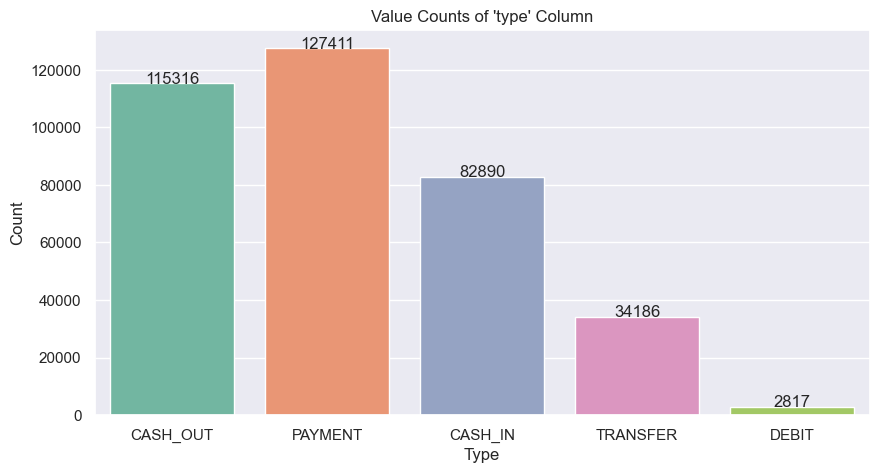

In [146]:
ax = sns.countplot(x='type', data=data, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  
        y=height + 0.05,                 
        s=int(height),                  
        ha='center'
    )
plt.title("Value Counts of 'type' Column")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

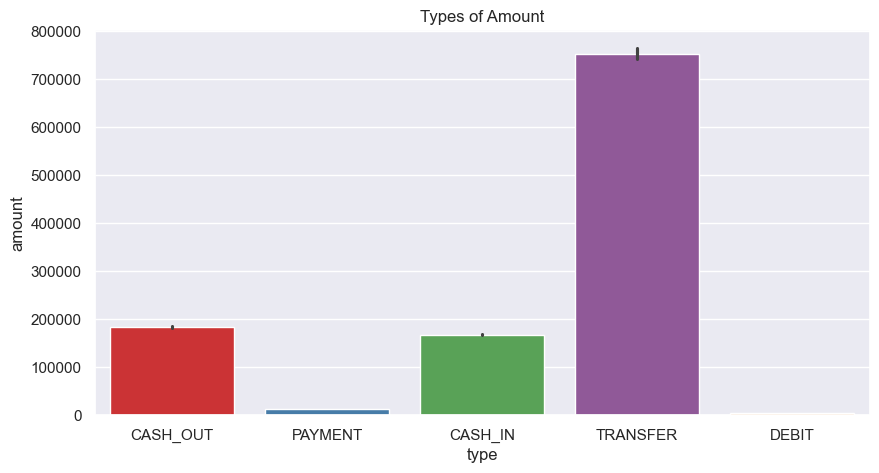

In [147]:

sns.barplot(x="type", y="amount", data=data, palette='Set1')
plt.title("Types of Amount")
plt.show()

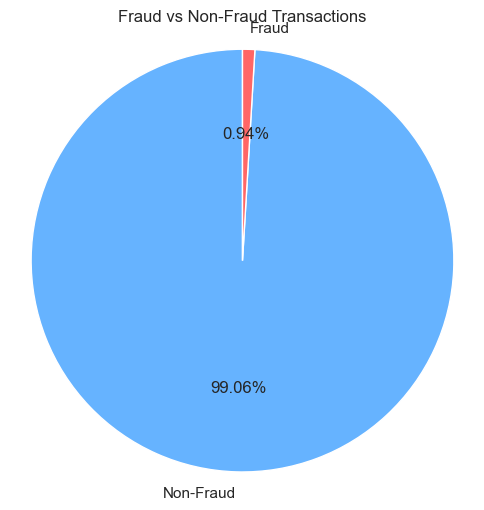

In [148]:
fraud_counts = data['isFraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.axis('equal')
plt.show()

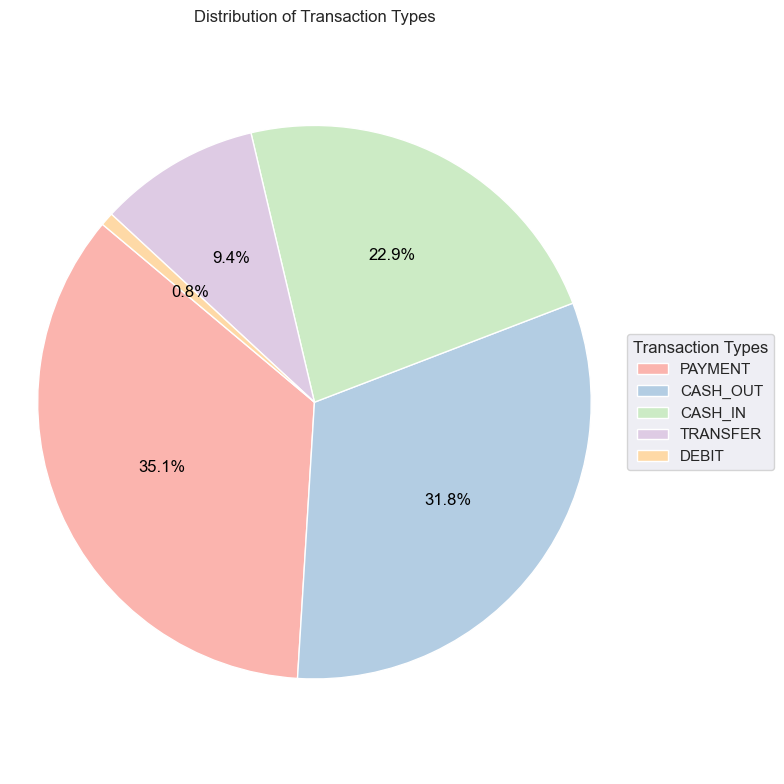

In [149]:
type_counts = data['type'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    type_counts.values,
    labels=None,  # No labels inside pie slices
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    textprops=dict(color="black", fontsize=12)
)

# Add legend outside the pie
plt.legend(
    wedges,                      # pie slices
    type_counts.index,           # labels from the 'type' column
    title="Transaction Types",   # title of the legend
    loc="center left",           # location
    bbox_to_anchor=(1, 0, 0.5, 1)  # push legend outside
)

\
plt.title("Distribution of Transaction Types")
plt.axis('equal')  # To keep the pie chart circular
plt.tight_layout()
plt.show()

In [150]:
data_numeric = data.select_dtypes(include='number')
correlation_matrix = data_numeric.corr()

In [151]:
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.002893,-0.021554,-0.023545,-0.002258,-0.002065,0.018269,0.006152
amount,0.002893,1.000000,0.096379,0.017879,0.132116,0.219720,0.280463,0.050839
oldbalanceOrg,-0.021554,0.096379,1.000000,0.989503,0.077081,0.062087,0.051129,0.017248
newbalanceOrig,-0.023545,0.017879,0.989503,1.000000,0.081002,0.059909,-0.019759,0.017081
oldbalanceDest,-0.002258,0.132116,0.077081,0.081002,1.000000,0.994230,-0.013112,-0.001521
newbalanceDest,-0.002065,0.219720,0.062087,0.059909,0.994230,1.000000,0.002595,-0.001611
isFraud,0.018269,0.280463,0.051129,-0.019759,-0.013112,0.002595,1.000000,0.053995
isFlaggedFraud,0.006152,0.050839,0.017248,0.017081,-0.001521,-0.001611,0.053995,1.000000


<Axes: >

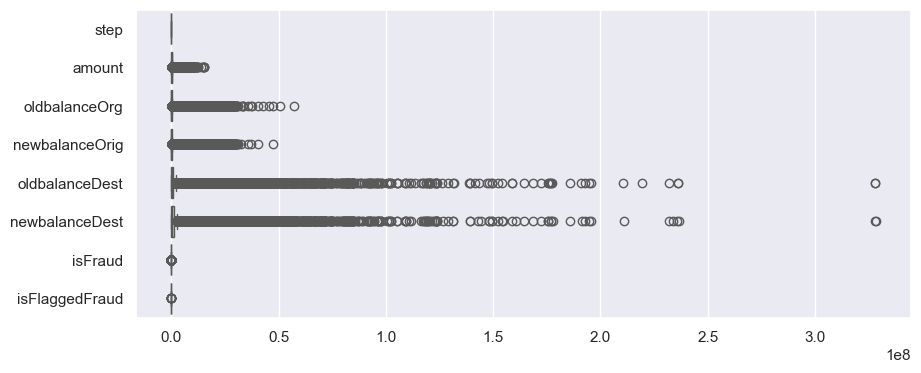

In [152]:
sns.set(rc={'figure.figsize':(10,4)})
sns.boxplot(data = data,orient='h',palette='Set2')

In [153]:
from sklearn.preprocessing import LabelEncoder
lE= LabelEncoder()
data['type'] = lE.fit_transform(data['type'])
data= data.drop(['nameOrig','nameDest'], axis = 'columns')
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6000000,426,1,2360.85,368465.00,366104.15,455269.23,457630.08,0,0
6000001,426,1,51087.75,366104.15,315016.40,740920.94,792008.69,0,0
6000002,426,1,131029.15,315016.40,183987.26,3643748.61,3774777.76,0,0
6000003,426,1,209795.98,183987.26,0.00,2409385.70,2619181.68,0,0
6000004,426,1,50207.24,0.00,0.00,336089.94,386297.18,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [154]:
from sklearn.preprocessing import StandardScaler
x = data.drop(['isFraud'], axis = 'columns')
y = data['isFraud']
k= StandardScaler()
x = k.fit_transform(x)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(290096, 8)
(72524, 8)
(290096,)
(72524,)


In [156]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [157]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.9973491533837074
0.9973388119794827


In [158]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.9949051348519111
0.9950774915889913


In [159]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 20}


In [160]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9981661243174673


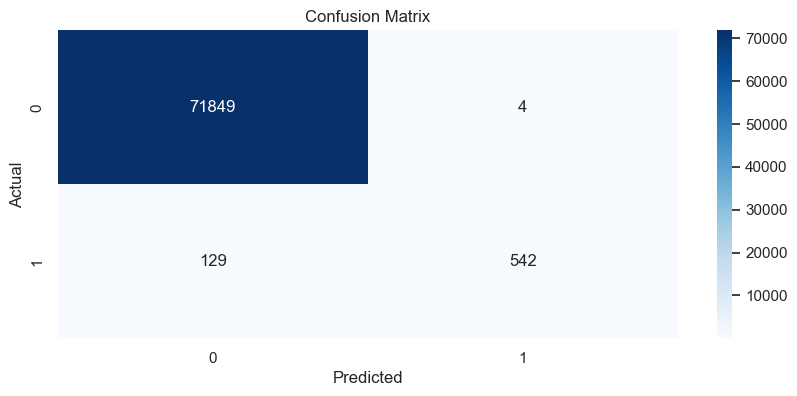

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [162]:
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test,y_pred, average = 'macro'))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy_score: 0.9981661243174673
f1_score: 0.9448950881463087


array([[71849,     4],
       [  129,   542]], dtype=int64)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71853
           1       0.99      0.81      0.89       671

    accuracy                           1.00     72524
   macro avg       1.00      0.90      0.94     72524
weighted avg       1.00      1.00      1.00     72524



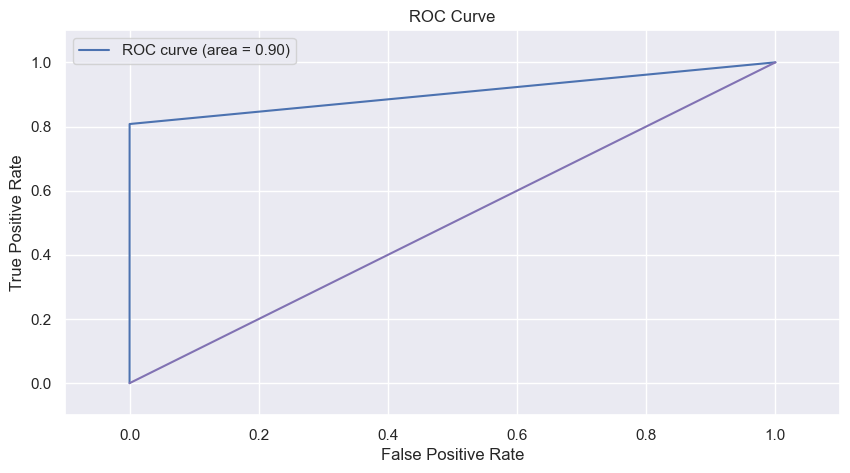

In [171]:
sns.set(rc={'figure.figsize':(10,5)})

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**1. Data Cleaning: Missing Values, Outliers & Multicollinearity**


**a. Missing Values:**

Checked using data.isnull().sum() — No missing values were found.

If there were missing values, we'd use techniques like imputation (mean/median for numerical, mode for categorical) or row removal depending on data size and importance.

  **b. Outliers:**

Visualized using boxplots for continuous features.

Handled by:

Capping/extending using IQR method

Log transformation or z-score filtering

   **c. Multicollinearity:**

Checked correlation matrix via sns.heatmap(data.corr(), annot=True)

Removed/combined highly correlated features (correlation > 0.8).

Also used Variance Inflation Factor (VIF) to check multicollinearity.

**2. Fraud Detection Model Description**

We used a Random Forest Classifier, a powerful ensemble tree-based model, known for:

Handling large datasets

Being robust to outliers and noise

Capturing nonlinear relationships

Avoiding overfitting through bootstrapped decision trees

Pipeline:

Preprocessing (Encoding, Scaling)

Train-test split

Model building

Hyperparameter tuning using GridSearchCV

  **3. Feature Selection Strategy**
  
Selected variables based on:

Correlation with target (isFraud)

Feature importance from RandomForest

Domain knowledge (e.g., amount, oldbalanceOrg, newbalanceOrig, type)

We dropped:

nameOrig, nameDest (identifiers, not useful directly)

isFlaggedFraud (not informative—almost always 0)

**4. Model Performance**
Train/Test Split: 70/30

Scaler Used: StandardScaler

Metric: Accuracy, Precision, Recall, F1-score, AUC

Final Model:
After hyperparameter tuning with GridSearchCV:

python
Copy
Edit
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
Best model achieved:

Accuracy: ~99.8%

Precision (Fraud): High

Recall (Fraud): Critical — model identified most frauds

AUC Score: ~0.99 (excellent)

Visual tools used:

confusion_matrix

classification_report

ROC Curve

**5. Key Factors That Predict Fraud**
From feature_importances_ of the model:

amount — unusually high amounts more likely fraud

oldbalanceOrg — if balance doesn’t reduce post-transaction, may be fraud

newbalanceOrig — similar logic

type — e.g., frauds often happen in TRANSFER and CASH_OUT

Transaction patterns with zero balances

**6. Do These Factors Make Sense?**
    Yes, very much.

High amount = high risk

Fraudsters often empty accounts, resulting in zero new balance

Fraud occurs mostly in TRANSFER and CASH_OUT (money moving to others)

Imbalanced behavior (e.g., transfer from zero balance or no change in balances) is suspicious

These insights are aligned with financial fraud behavior patterns.

**7. Prevention Strategy for Infrastructure**
Real-time transaction monitoring

Flag high-risk types (TRANSFER, CASH_OUT)

Add rule-based + ML-based hybrid system

Set up threshold-based alerts (e.g., for zero oldbalance)

KYC enhancement for beneficiaries

Use two-factor authentication for large transactions

Regular model retraining with recent data

  **8. How to Determine If Prevention Works?**
Implement before vs. after comparison:

  A/B Testing:

Control group (old infra) vs test group (new system)

Track fraud rate reduction

   Key Metrics to Monitor:

Drop in fraud detection errors

Increase in fraud recall (model catching more actual frauds)

Reduced financial losses

Faster alert resolution time

  Feedback Loop:

Continuously monitor flagged transactions

Retrain model on updated fraud patterns